In [2]:
import os
import glob

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy.io
from scipy.io import loadmat

import mne
from mne.preprocessing import ICA

In [3]:
matfiles = glob.glob('ADHD_part2/*.mat') 

data = {}
matfiles

['ADHD_part2/v177.mat',
 'ADHD_part2/v215.mat',
 'ADHD_part2/v200.mat',
 'ADHD_part2/v213.mat',
 'ADHD_part2/v206.mat',
 'ADHD_part2/v204.mat',
 'ADHD_part2/v238.mat',
 'ADHD_part2/v198.mat',
 'ADHD_part2/v263.mat',
 'ADHD_part2/v288.mat',
 'ADHD_part2/v274.mat',
 'ADHD_part2/v270.mat',
 'ADHD_part2/v265.mat',
 'ADHD_part2/v254.mat',
 'ADHD_part2/v286.mat',
 'ADHD_part2/v279.mat',
 'ADHD_part2/v250.mat',
 'ADHD_part2/v244.mat',
 'ADHD_part2/v246.mat',
 'ADHD_part2/v284.mat',
 'ADHD_part2/v181.mat',
 'ADHD_part2/v234.mat',
 'ADHD_part2/v209.mat',
 'ADHD_part2/v196.mat',
 'ADHD_part2/v236.mat',
 'ADHD_part2/v183.mat',
 'ADHD_part2/v227.mat',
 'ADHD_part2/v179.mat',
 'ADHD_part2/v190.mat',
 'ADHD_part2/v231.mat',
 'ADHD_part2/v219.mat']

In [4]:
mat_data = loadmat(matfiles[10])
eeg_data = mat_data['v274']

In [5]:
ch_names = ['Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2']
sfreq = 128

info = mne.create_info(ch_names = ch_names, sfreq=sfreq, ch_types = 'eeg')

eeg_data = eeg_data.T

In [6]:
raw = mne.io.RawArray(eeg_data, info)
raw.apply_function(lambda x: x*1e-6, channel_wise=False)

Creating RawArray with float64 data, n_channels=19, n_times=17323
    Range : 0 ... 17322 =      0.000 ...   135.328 secs
Ready.


<RawArray | 19 x 17323 (135.3 s), ~2.5 MB, data loaded>

Using matplotlib as 2D backend.


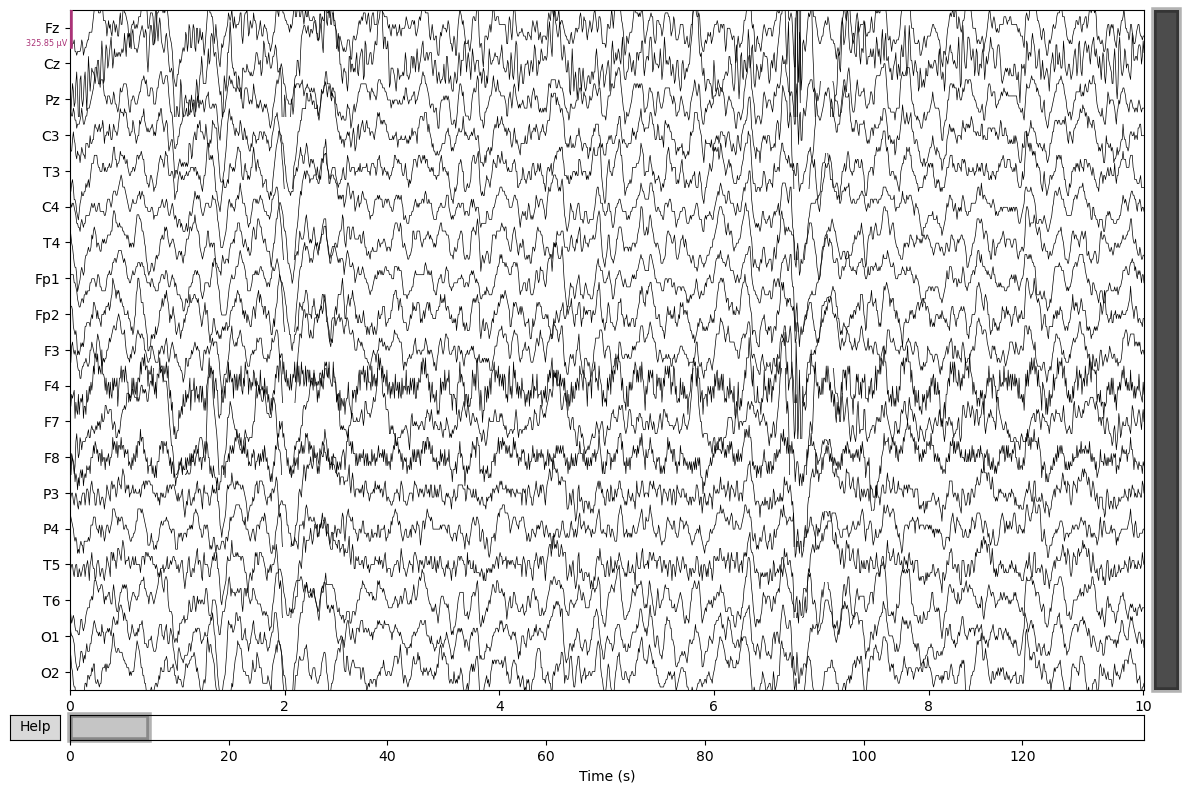

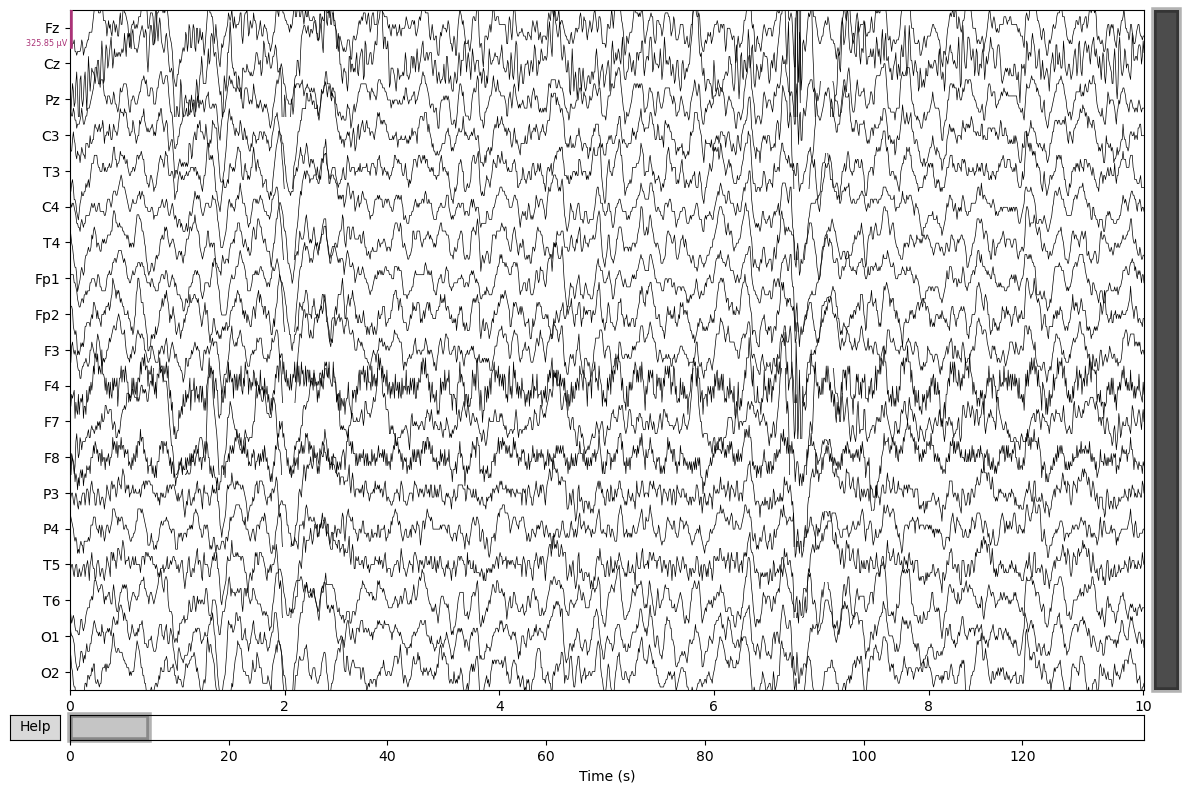

In [7]:
%matplotlib inline
mne.viz.set_browser_backend("matplotlib")
raw.plot(n_channels=19, scalings="auto", duration = 10.0)

Effective window size : 16.000 (s)


/var/folders/48/l60ld_dj1kggcvhp0rsys4qm0000gn/T/ipykernel_1559/2556455308.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum = raw.compute_psd().plot()
/Users/juanvera/anaconda3/envs/rep2/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


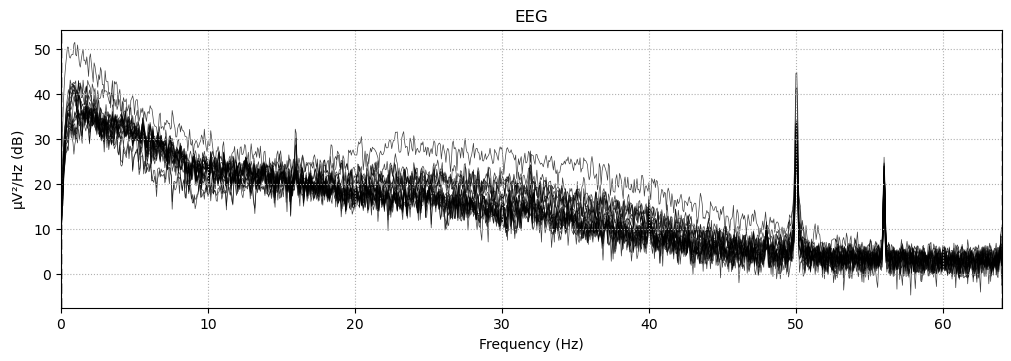

In [8]:
spectrum = raw.compute_psd().plot()

PSD Chart | Applied Fast Fourier Transform

Vertical peaks at 50 Hz and 56/57 Hz indicate powerline noise in the signal.
The EEG dataset was record in Iran which explains the vertical spike at 50 Hz. The spike at 56/57 Hz is present for unknown reasons (at least according to my limited knowledge)

PSD is decreased at higher frequencies as brain activity rarely reaches those frequencies. Think of it as MHR.

The raw data also exhibits a higher PSD at frequencies in the Delta and Theta band as expected. ADHD is commonly associated with these frequency bands | [1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4973024/#:~:text=Compared%20with%20the%20control%20group%2C%20the%20ADHD%20group%20had%20significantly,significantly%20higher%20beta%20power%20(Fig.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 423 samples (3.305 s)

Effective window size : 16.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/var/folders/48/l60ld_dj1kggcvhp0rsys4qm0000gn/T/ipykernel_1559/2314893463.py:5: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.compute_psd().plot()
/Users/juanvera/anaconda3/envs/rep2/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


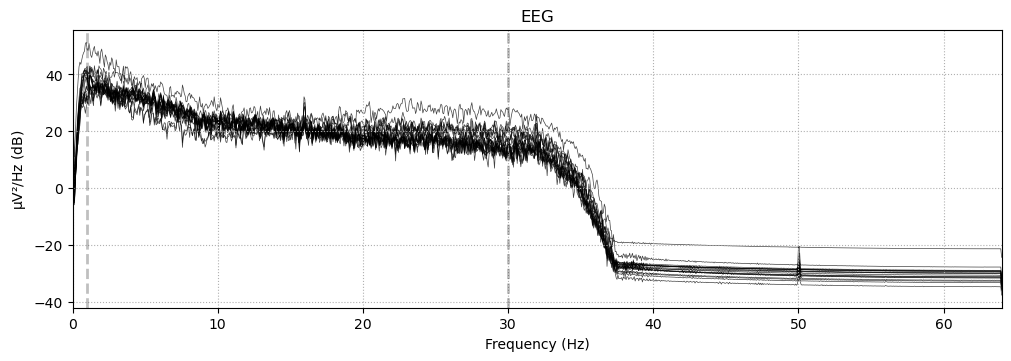

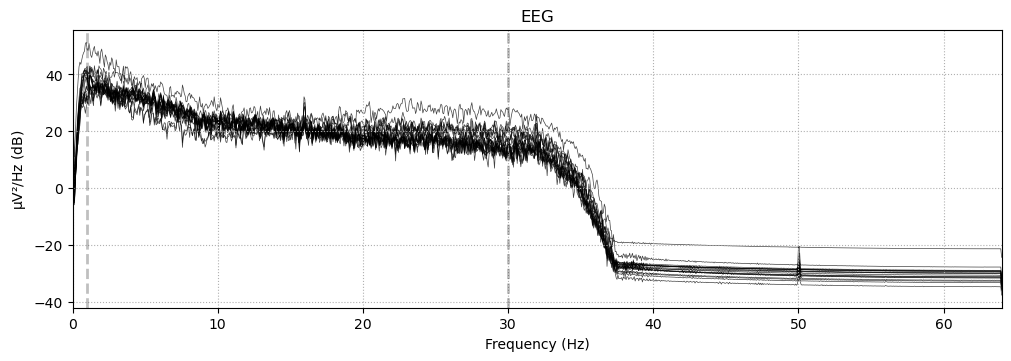

In [9]:
bp_low_cut_freq = 1
bp_high_cut_freq = 30

raw_filtered = raw.copy().filter(bp_low_cut_freq, bp_high_cut_freq)
raw_filtered.compute_psd().plot()

In the aforewritten code, we filtered a signal using a bandpass filter. This bandpass filter had a low cut frequency (low_cut_freq) set as None, meaning we didn't set one. 
In regards to our dataset, we don't want to cut out the lower EEG frequency signals as ADHD can be characterized by those lowered frequency bands.

We set a high cut frequency (high_cut_freq) at 49 Hz to decrease artifacts as a result of powerline interference.

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Effective window size : 16.000 (s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
/var/folders/48/l60ld_dj1kggcvhp0rsys4qm0000gn/T/ipykernel_1559/756744634.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.compute_psd().plot()
/Users/juanvera/anaconda3/envs/rep2/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


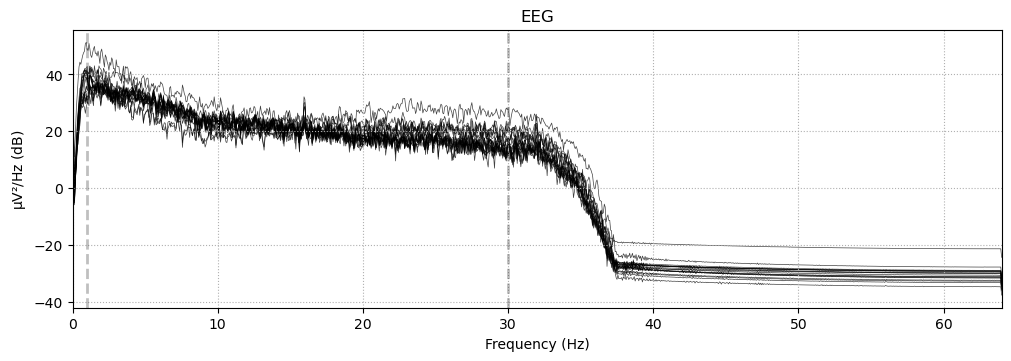

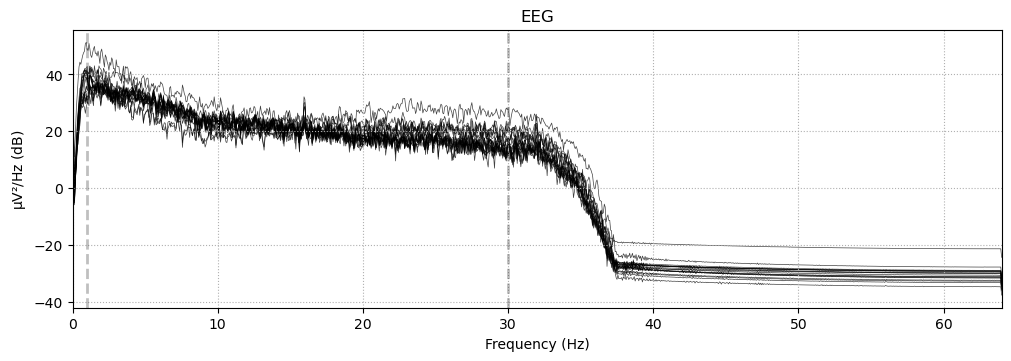

In [10]:
raw_filtered = raw_filtered.notch_filter(50)
raw_filtered.compute_psd().plot()

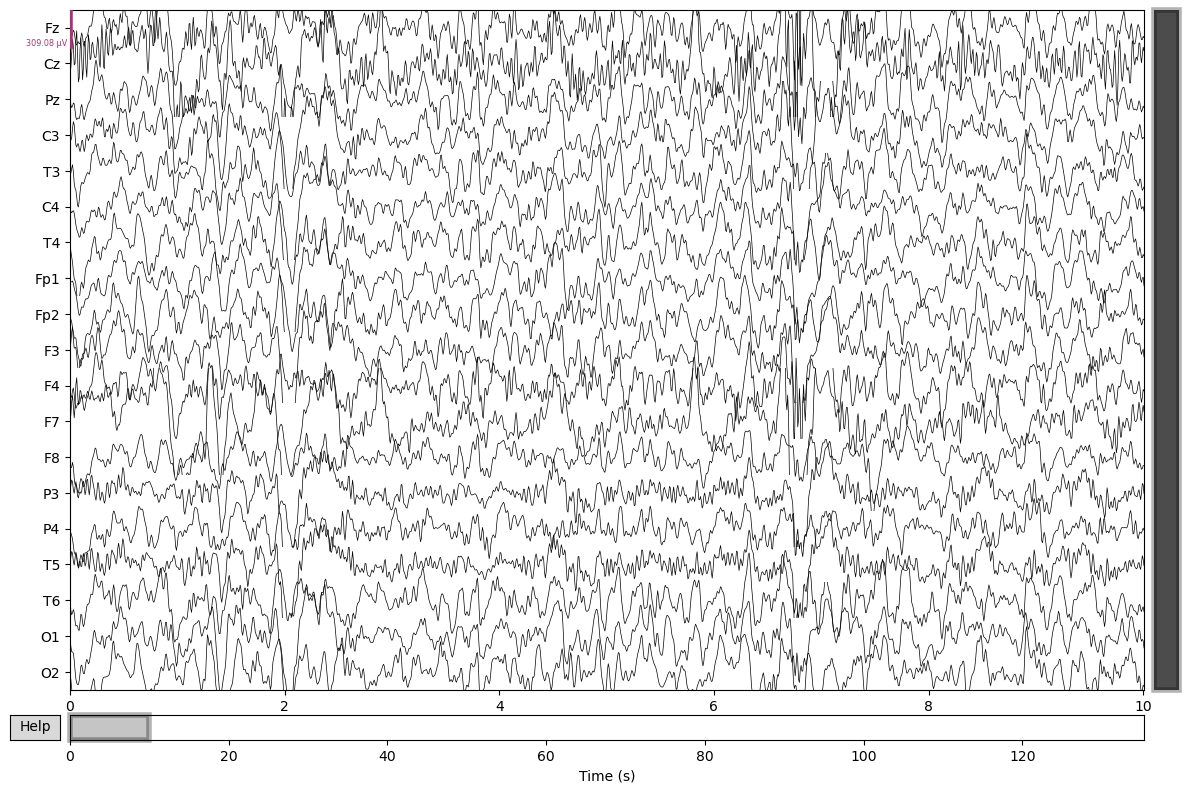

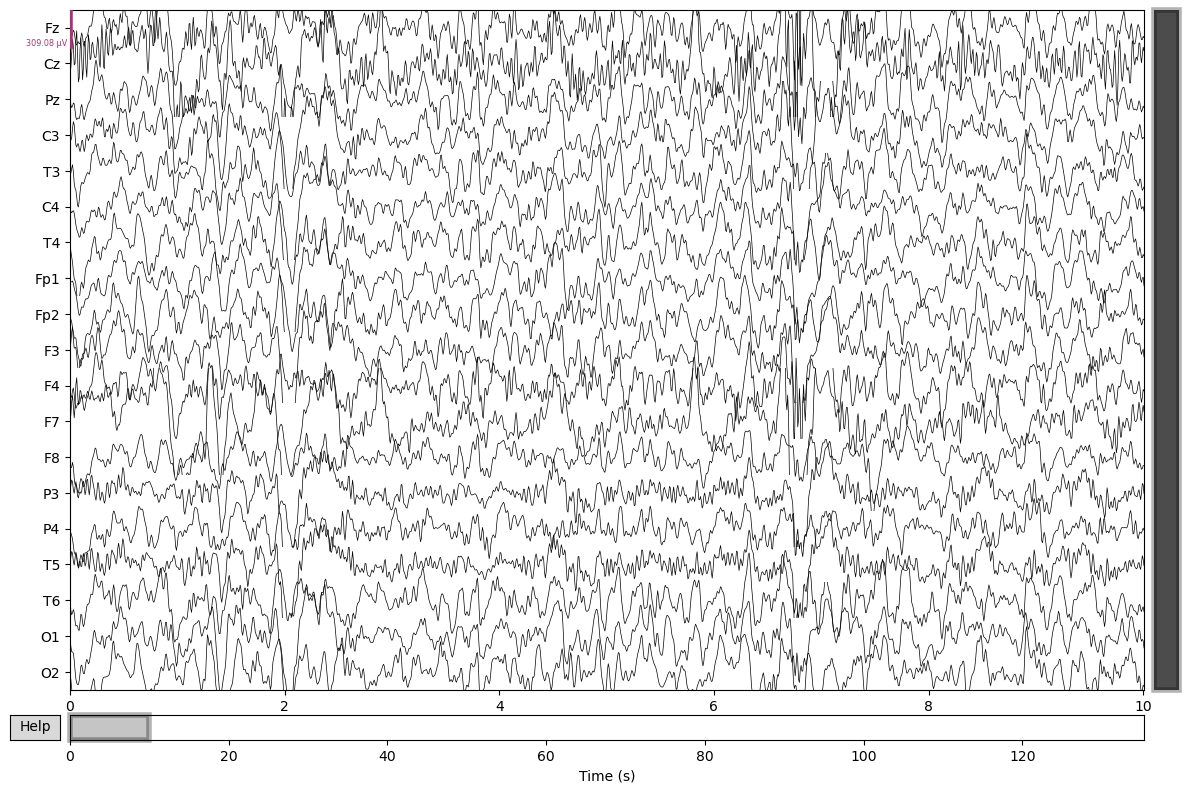

In [11]:
raw_filtered.plot(n_channels = 19, scalings = "auto", duration = 10.0)

This is our filtered EEG recording in the Spatial Domain.

When compared to the original signal plotted in cell 6, we can see some noticeable differences particularly in the channels F7, F4, and F8 with slight variations in others as well. 
This due to our signal being cleansed of artifacts from powerline noise.

At this point, our next step would be to epoch our data in order to understand the ERPs. But our dataset unfortunately did not contain a stim channel nor metadata informing of any specific time period at which pictures shown to the ADHD children were interchanged. Therefore, there isn't a need to epoch our data to understand specific ERPs.

So we can move on to the next phase.

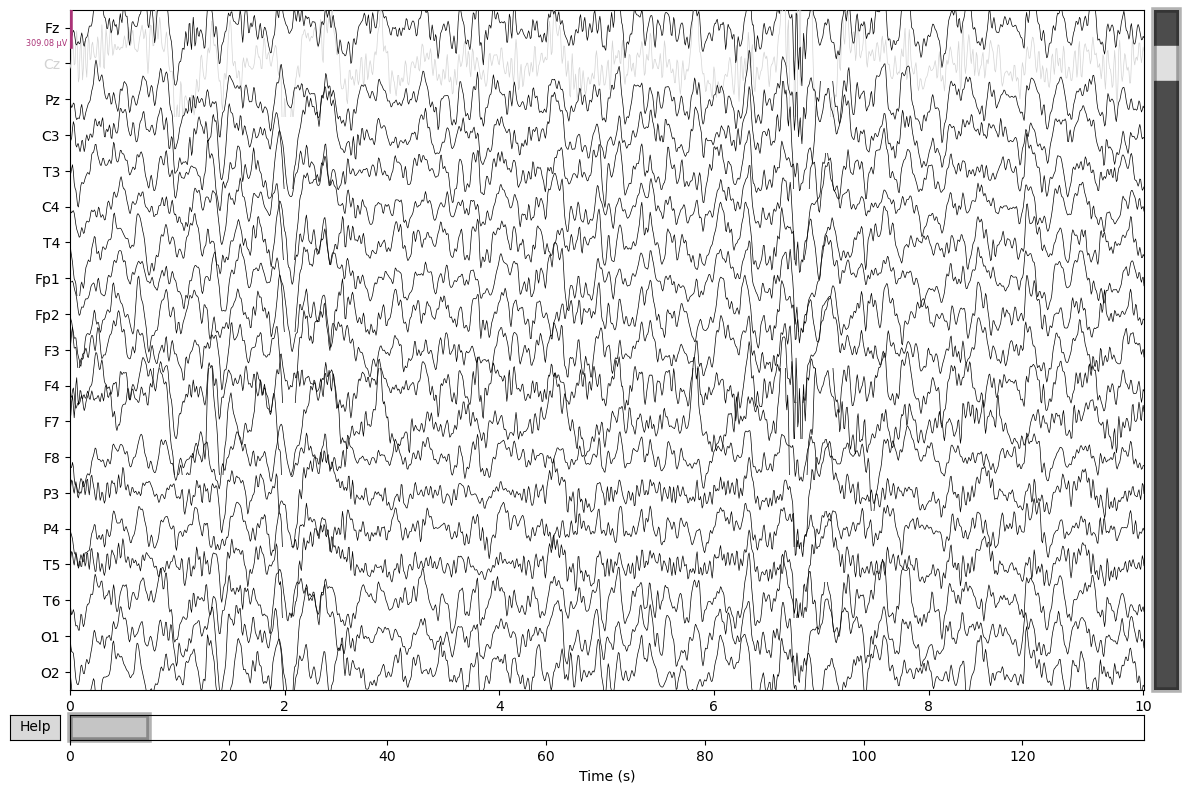

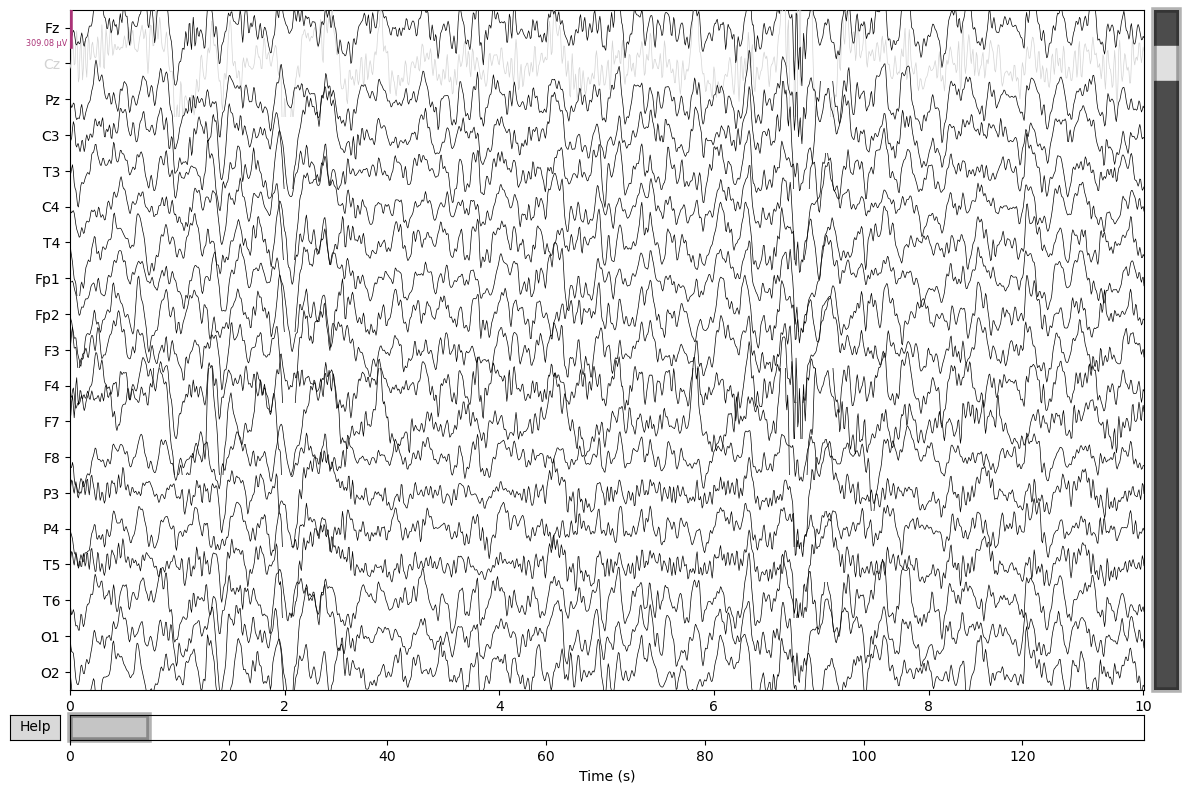

In [12]:
bad_channels = ['Cz']
raw_filtered.info['bads']=bad_channels
raw_filtered.plot(n_channels = 19, scalings = "auto", duration = 10.0)

Based on the cell prior we can see that channel Cz is unnecessarily noisy. So we mark that channel as 'bad'.

In [13]:
raw_filtered.set_montage('standard_1020')
raw_filtered.info['bads']=bad_channels
raw_filtered.interpolate_bads()

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.4 mm
Computing interpolation matrix from 18 sensor positions
Interpolating 1 sensors


<RawArray | 19 x 17323 (135.3 s), ~2.5 MB, data loaded>

Now, we interpolate our 'Bad' channel, Cz. Interpolating a channel basically takes the information from the other channels to predict the data of the bad channel which in this case is Cz.

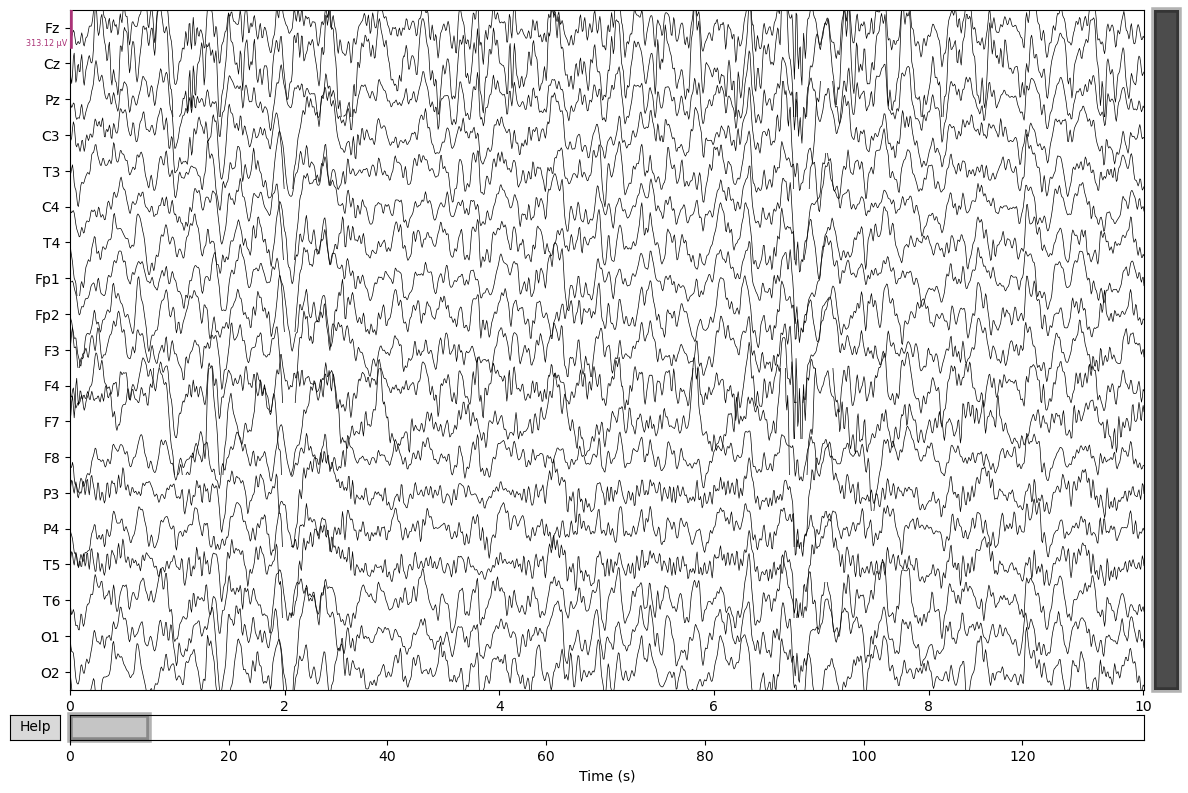

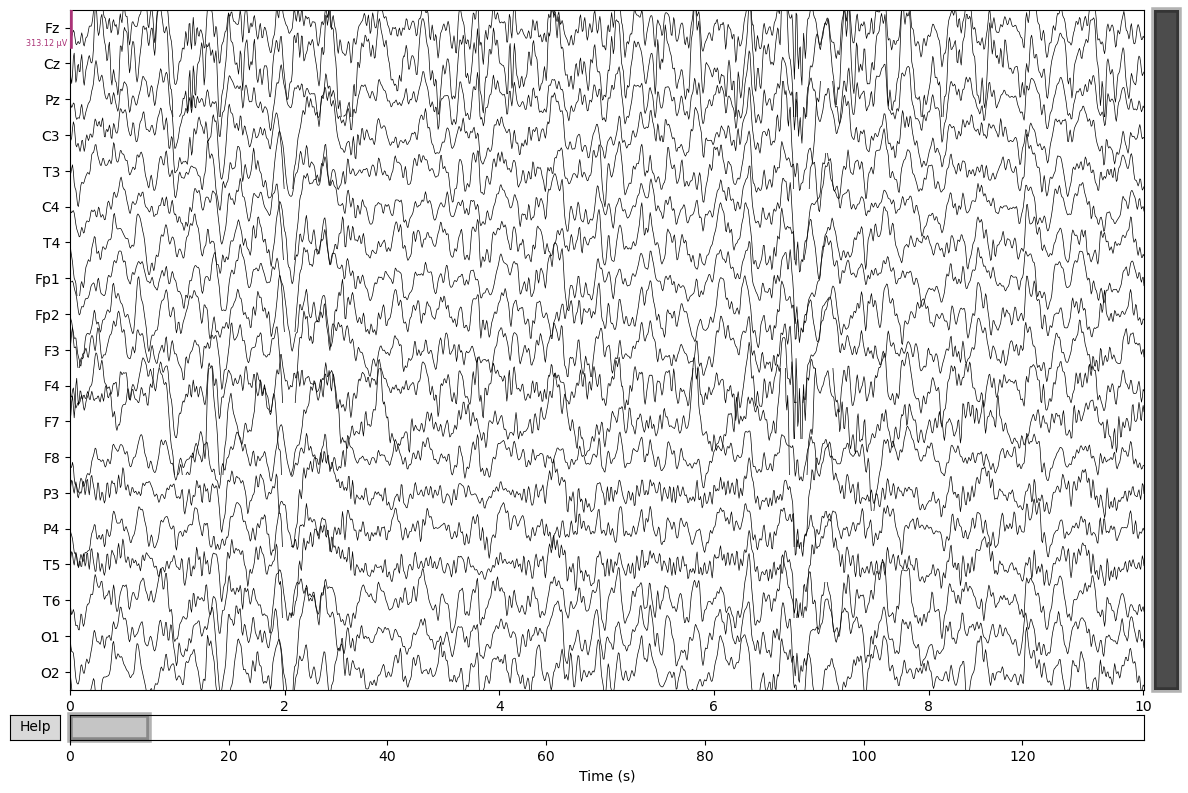

In [14]:
raw_filtered.plot(scalings = "auto", n_channels = 19, duration = 10.0)

We can see that the bad channel, Cz, is now no longer as noisy and seems to be of higher quality. 

Now, while interpolation can seem like a useful tool, it's important to note that the data produced as a result of interpolation may not be accurate - it's a mere educated guess based off of mathematical algorithms.

Now onto epoching our dataset (optional, not required; Included for demonstration purposes).

In [15]:
#Feel free to remove the "##" and run the cell to see it in action.

##event_onsets_seconds = [0, 2, 6]
##sfreq = raw_filtered.info['sfreq']
##event_onsets_samples = [int(onset * sfreq) for onset in event_onsets_seconds]
##events = np.array([(onset, 0, 1) for onset in event_onsets_samples], dtype=int)

##epochs = mne.Epochs(raw_filtered, events, tmin=-1, tmax=2, baseline=None)

##epochs.plot(n_channels=len(ch_names), scalings='auto', show=True)

As you can see, we can Epoch our data into different segments. Epoching our data can serve us when we have identified specific segments of our signal that holds specific events.

In this scenario though, there isn't a need to epoch as our dataset doesn't have any recorded events.

Effective window size : 16.000 (s)


/Users/juanvera/anaconda3/envs/rep2/lib/python3.11/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


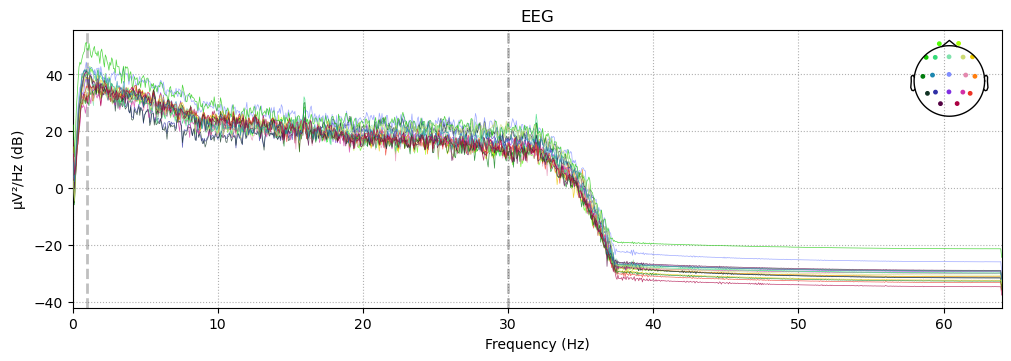

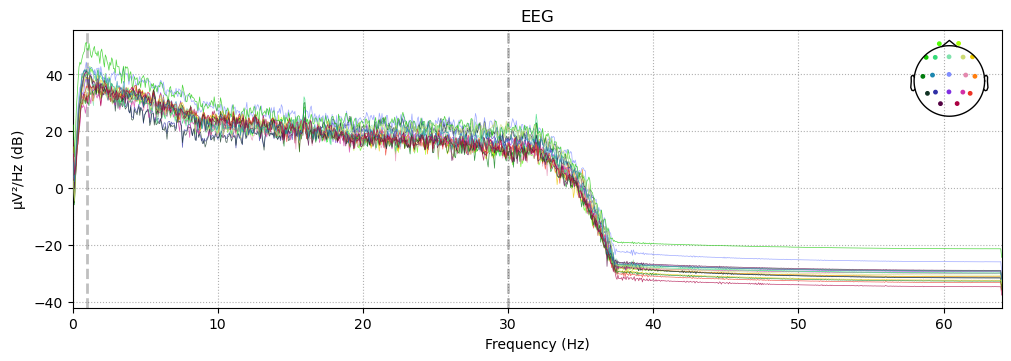

In [16]:
raw_filtered.compute_psd().plot()

We ensure that our PSD plot looks how we want it to look.

In [17]:
start_time = 0.0
end_time = 10.0

raw_filtered = raw_filtered.copy().crop(tmin=start_time, tmax=end_time)


n_components = 18
ica = ICA(n_components=n_components, random_state=10, max_iter = 'auto')
ica.fit(raw_filtered)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 18 components
Fitting ICA took 3.2s.


/Users/juanvera/anaconda3/envs/rep2/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 1281 samples), 18 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

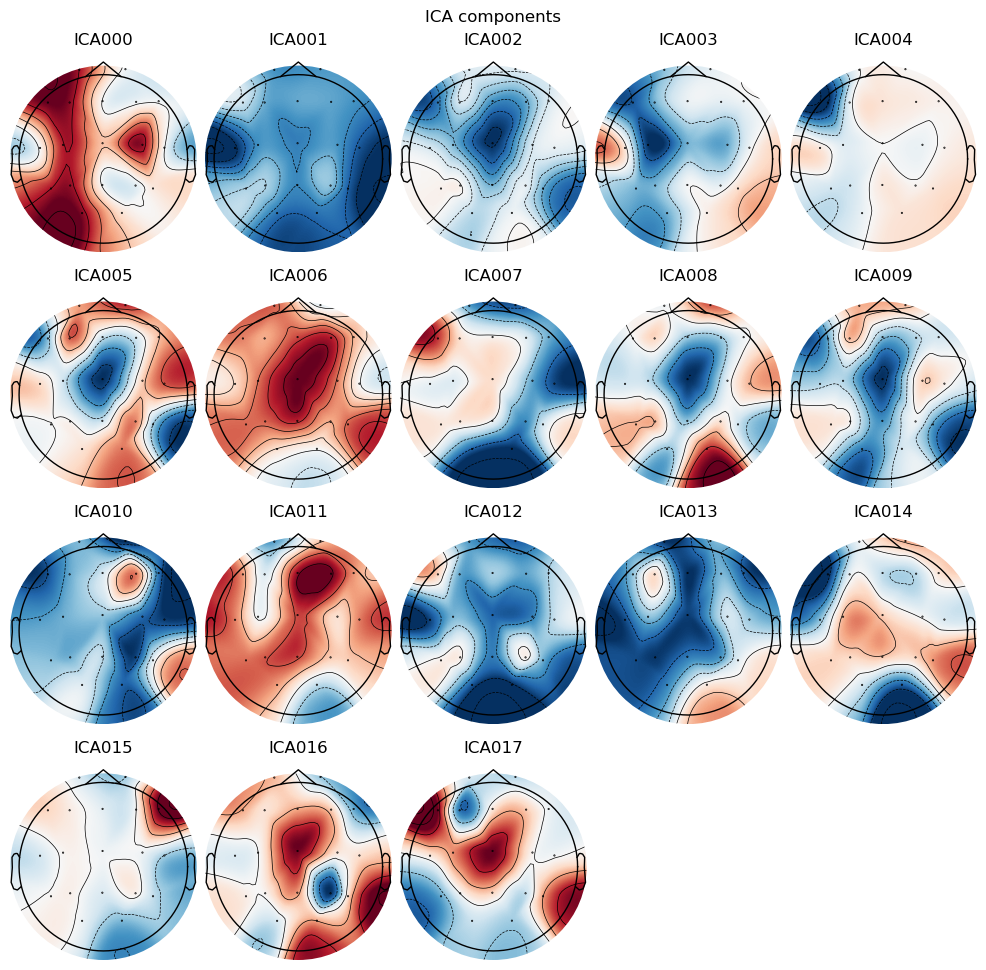

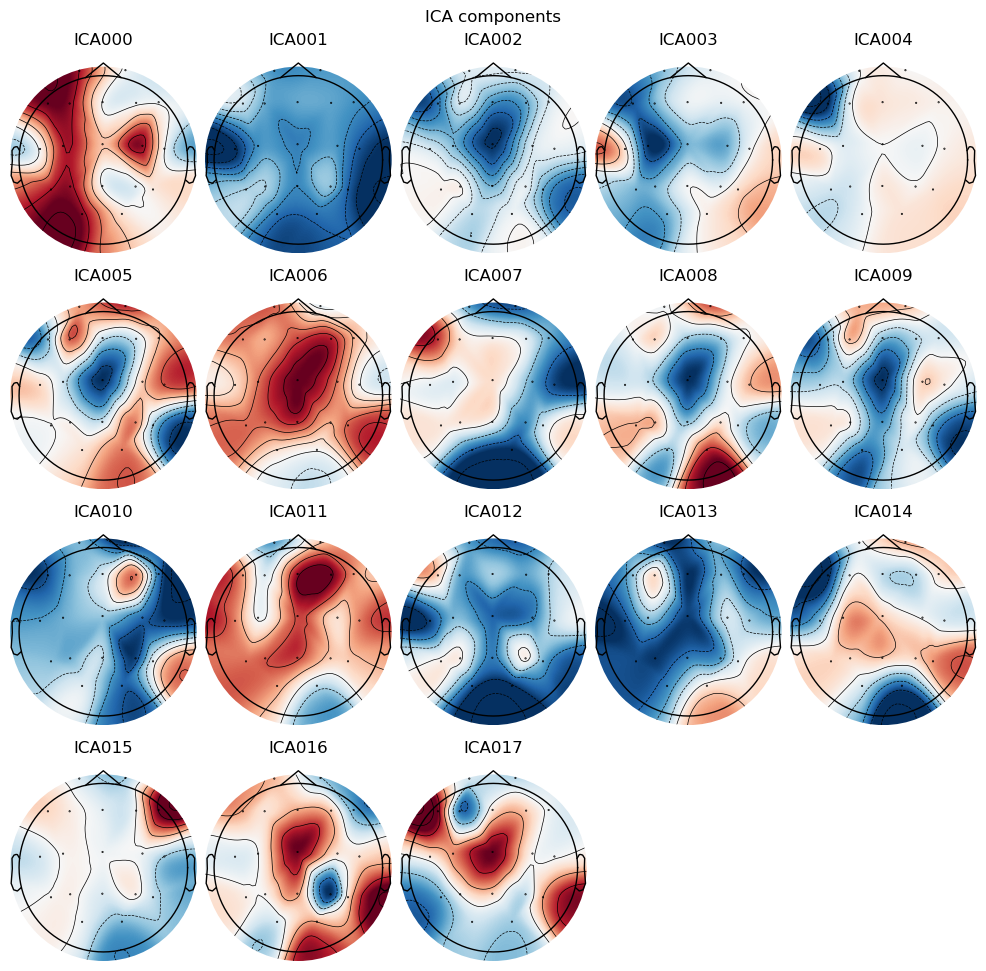

In [18]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
67 matching events found
No baseline correction applied
0 projection items activated


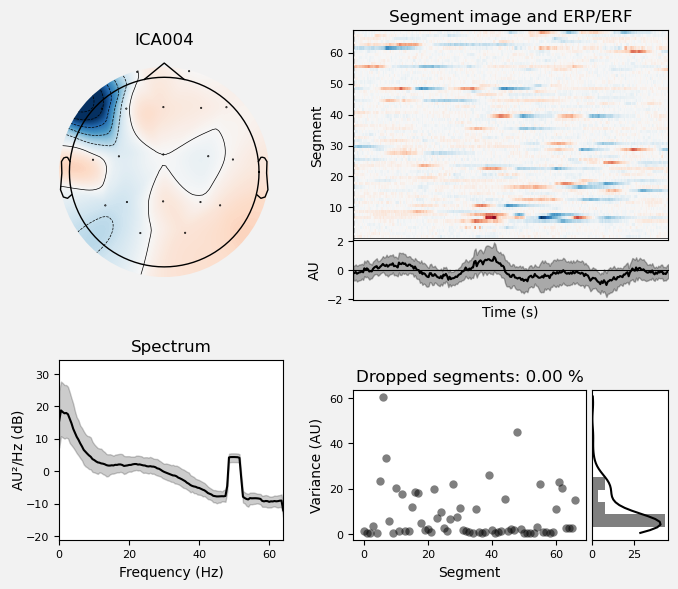

[<Figure size 700x600 with 6 Axes>]

In [19]:
ica.plot_properties(raw, picks=4)